# This is the Juypter Notebook containing simulations for Theorem 6 in the paper "Networked Competitive Bivirus SIS Model - Analysis of the Discrete-Time Case"

In [2]:
import bivirus
import numpy as np
import importlib
importlib.reload(bivirus)

<module 'bivirus' from '/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py'>

In [3]:
def path_graph_adjacency(n, W = 1):
    A = np.zeros((n, n))
    for i in range(n - 1):
        A[i, i + 1] = np.random.uniform(0, W)
        A[i + 1, i] = np.random.uniform(0, W)
    return A

In [4]:
# configurations of the experiment
config = bivirus.SimulationConfig(N=20, h=0.001, threshold=1.5, W=2, iterations=10000, tolerance=1e-6)

# random seed for reproducibility
seed = 1049
np.random.seed(seed)

# parameters of the model
A1_raw, A2_raw = np.random.uniform(0, config.W, (config.N, config.N)), np.random.uniform(0, config.W, (config.N, config.N))
# Set all values in A below 'threshold' to zero
A1_thres = np.where(A1_raw < config.threshold, 0, A1_raw)
A2_thres = np.where(A2_raw < config.threshold, 0, A2_raw)

# add the path graph adjacency matrix to ensure strong connectivity
A1 = A1_thres + path_graph_adjacency(config.N, W=config.W/10)
A2 = A2_thres + path_graph_adjacency(config.N, W=config.W/10)

beta = [
    0.7 * np.ones(config.N),
    0.4 * np.ones(config.N)
]
B1 = np.diag(beta[0]) @ A1
B2 = np.diag(beta[1]) @ A2
B = [B1, B2]
delta = [
    0.1 * np.ones(config.N),
    1 * np.ones(config.N)
]
print("B1 is:", B1)
print()
print("B2 is:", B2)

B1 is: [[1.05035672 1.32023924 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.09348044
  1.1729385  0.        ]
 [0.13994178 1.25488928 0.11978092 0.         1.32887652 1.22760733
  0.         0.         1.1315009  1.39263575 0.         0.
  0.         0.         0.         1.33903502 0.         1.28040546
  0.         0.        ]
 [0.         0.10678711 0.         1.26974253 0.         0.
  0.         1.29726894 0.         0.         0.         0.
  0.         1.14132825 1.0680276  1.06939919 0.         0.
  1.05687895 0.        ]
 [0.         1.21372813 1.36631522 0.         0.07434063 1.18822824
  0.         0.         1.32667998 0.         0.         0.
  1.15304529 0.         1.39530892 0.         0.         0.
  0.         1.0640707 ]
 [0.         0.         0.         0.04176621 0.         1.31615517
  0.         0.         1.31818358 1.33929284 1.12248437 0.
  0.         

/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8194/195010118.py:22: RuntimeWarning: divide by zero encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8194/195010118.py:22: RuntimeWarning: overflow encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8194/195010118.py:22: RuntimeWarning: invalid value encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8194/195010118.py:23: RuntimeWarning: divide by zero encountered in matmul
  B2 = np.diag(beta[1]) @ A2
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8194/195010118.py:23: RuntimeWarning: overflow encountered in matmul
  B2 = np.diag(beta[1]) @ A2
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8194/195010118.py:23: RuntimeWarning: invalid value encountered in matmul
  B2 = np.diag(beta[1]) @ A2


In [5]:
# check assumptions of the theorems 2 and 3
print("Assumptions of theorems:")
print("Theorem 2 satisfied:", bivirus.check_theorem_2(B, delta, config))
print("Theorem 3:", bivirus.check_theorem_3(B, delta, config))

Assumptions of theorems:
spectral radius 1 is 1.0059168078495964
spectral radius 2 is 1.0026796597001768
Theorem 2 satisfied: False
Theorem 3: 0


In [6]:
# calculate the boundary equilibria corresponding to virus 1 and virus 2
x1_bar = bivirus.x_bar(0.1 * np.ones(config.N), B[0], delta[0], config)
x2_bar = bivirus.x_bar(0.1 * np.ones(config.N), B[1], delta[1], config)
print("x1_bar: ", x1_bar.round(4))
print("x2_bar: ", x2_bar.round(4))

# Confirm whether the boundary equilibria for one virus is component-wise greater than the other
print("\nx1_bar << x2_bar:", np.all(x1_bar < x2_bar)) 
print("x1_bar >> x2_bar:", np.all(x1_bar > x2_bar))

x_bar Converged at iteration 3280
x_bar Converged at iteration 4919
x1_bar:  [0.9785 0.9891 0.9857 0.9885 0.9864 0.98   0.9796 0.9849 0.9803 0.9898
 0.973  0.9632 0.9715 0.9722 0.9833 0.9846 0.9799 0.9881 0.9755 0.9796]
x2_bar:  [0.7003 0.6589 0.7905 0.7087 0.7863 0.7457 0.7669 0.7207 0.6954 0.7377
 0.804  0.3769 0.8001 0.6817 0.5908 0.7365 0.5941 0.7171 0.6921 0.7634]

x1_bar << x2_bar: False
x1_bar >> x2_bar: True


/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:67: RuntimeWarning: divide by zero encountered in matmul
  x = x + h * ((np.eye(N) - np.diag(x)) @ B1 - np.diag(delta)) @ x
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:67: RuntimeWarning: overflow encountered in matmul
  x = x + h * ((np.eye(N) - np.diag(x)) @ B1 - np.diag(delta)) @ x
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:67: RuntimeWarning: invalid value encountered in matmul
  x = x + h * ((np.eye(N) - np.diag(x)) @ B1 - np.diag(delta)) @ x


## Part i. the equilibrium point (0, 0) is unstable

To validate part i) of Theorem 6, we add a small pertubation to (0, 0) and use that as the initial conditions, and run simulations of the system till convergance. 

/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:32: RuntimeWarning: divide by zero encountered in matmul
  x[0] = x[0] + h * ((np.eye(N) - sum_of_x) @ B[0] - np.diag(delta[0])) @ x[0]
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:32: RuntimeWarning: overflow encountered in matmul
  x[0] = x[0] + h * ((np.eye(N) - sum_of_x) @ B[0] - np.diag(delta[0])) @ x[0]
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:32: RuntimeWarning: invalid value encountered in matmul
  x[0] = x[0] + h * ((np.eye(N) - sum_of_x) @ B[0] - np.diag(delta[0])) @ x[0]
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:33: RuntimeWarning: divide by zero encountered in matmul
  x[1] = x[1] + h * ((np.eye(N) - sum_of_x) @ B[1] - np.diag(delta[1])) @ x[1]
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:33: Runt

x1 is [0.09715804 0.09715804 0.09715804 0.09715804 0.09715804 0.09715804
 0.09715804 0.09715804 0.09715804 0.09715804 0.09715804 0.09715804
 0.09715804 0.09715804 0.09715804 0.09715804 0.09715804 0.09715804
 0.09715804 0.09715804]
x2 is [0.08262027 0.08262027 0.08262027 0.08262027 0.08262027 0.08262027
 0.08262027 0.08262027 0.08262027 0.08262027 0.08262027 0.08262027
 0.08262027 0.08262027 0.08262027 0.08262027 0.08262027 0.08262027
 0.08262027 0.08262027]
All assumptions satisfied
Main loop Converged at iteration 8279
x1 is [0.03887839 0.03887839 0.03887839 0.03887839 0.03887839 0.03887839
 0.03887839 0.03887839 0.03887839 0.03887839 0.03887839 0.03887839
 0.03887839 0.03887839 0.03887839 0.03887839 0.03887839 0.03887839
 0.03887839 0.03887839]
x2 is [0.01962764 0.01962764 0.01962764 0.01962764 0.01962764 0.01962764
 0.01962764 0.01962764 0.01962764 0.01962764 0.01962764 0.01962764
 0.01962764 0.01962764 0.01962764 0.01962764 0.01962764 0.01962764
 0.01962764 0.01962764]
All assumpti

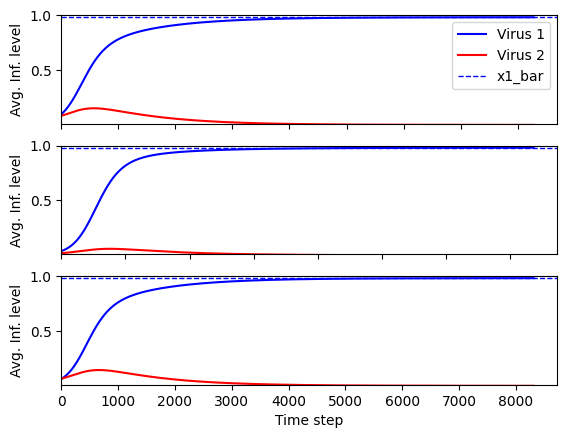

In [7]:
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for i in range(3):
    pertubation = np.random.uniform(0, 0.1)
    x1.fill(pertubation)
    print("x1 is "+str(x1))
    pertubation = np.random.uniform(0, 0.1)
    x2.fill(pertubation)
    print("x2 is " + str(x2))
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)

    # record results
    x1_histories.append(results["x1_history"])
    x2_histories.append(results["x2_history"])
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])

bivirus.plot_simulation_1by3(x1_avg_histories, x2_avg_histories, x1_bar_avg=np.mean(x1_bar), yscale='linear')


## Part ii. The equilibrium ($0, \bar{x}_2$) is unstable

To validate part ii) of the theorem, we will add a small pertubation to ($0, \bar{x}_2$) and use that as the initial conditions for the simulation.

x1 is [0.01758202 0.01758202 0.01758202 0.01758202 0.01758202 0.01758202
 0.01758202 0.01758202 0.01758202 0.01758202 0.01758202 0.01758202
 0.01758202 0.01758202 0.01758202 0.01758202 0.01758202 0.01758202
 0.01758202 0.01758202]
x2 is [0.71787503 0.67644686 0.80804048 0.72632635 0.80388162 0.76324067
 0.78448494 0.73828468 0.71295799 0.75526001 0.82162142 0.39451982
 0.8176709  0.69927377 0.60833216 0.75404509 0.61168101 0.7346725
 0.70968628 0.78100151]
All assumptions satisfied
Reached max iterations and did not converge
x1 is [0.089081 0.089081 0.089081 0.089081 0.089081 0.089081 0.089081 0.089081
 0.089081 0.089081 0.089081 0.089081 0.089081 0.089081 0.089081 0.089081
 0.089081 0.089081 0.089081 0.089081]
x2 is [0.78937402 0.74794584 0.87953946 0.79782533 0.87538061 0.83473965
 0.85598393 0.80978366 0.78445697 0.82675899 0.8931204  0.4660188
 0.88916988 0.77077275 0.67983114 0.82554407 0.68317999 0.80617148
 0.78118526 0.85250049]
All assumptions satisfied
Reached max iterations 

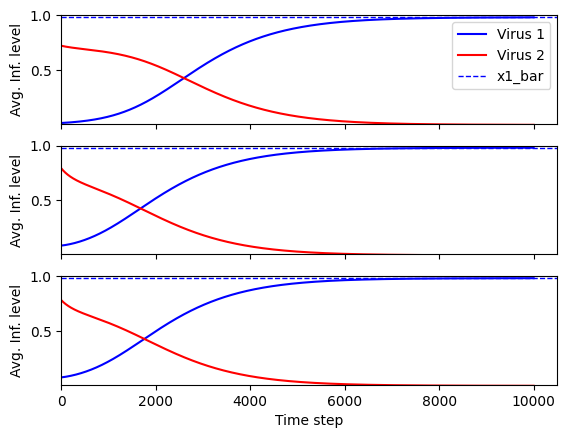

In [8]:
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for i in range(3):
    pertubation = np.random.uniform(0, 0.1)
    x1.fill(pertubation)
    print("x1 is " + str(x1))
    x2 = x2_bar + pertubation * np.ones(config.N)
    print("x2 is " + str(x2))
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)

    # record results
    x1_histories.append(results["x1_history"])
    x2_histories.append(results["x2_history"])
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])

bivirus.plot_simulation_1by3(x1_avg_histories, x2_avg_histories, x1_bar_avg=np.mean(x1_bar), yscale='linear')


## Part iii. the Equilibrium point ($\bar{x}_1, 0$) is locally exponentially stable

To validate part iii) of the theorem, we will add a small pertubation to ($\bar{x}_1, 0$) and use that as the initial conditions for the simulation. We expect to see the system converge back to ($\bar{x}_1, 0$) exponentially.

x1 is [0.96333329 0.97390977 0.97047892 0.97333374 0.97122476 0.96477817
 0.96442697 0.96965456 0.96514897 0.9745518  0.95784749 0.94801649
 0.95634484 0.95696533 0.96807817 0.96937963 0.96465668 0.97293252
 0.96029702 0.96435209]
x2 is [0.01519852 0.01519852 0.01519852 0.01519852 0.01519852 0.01519852
 0.01519852 0.01519852 0.01519852 0.01519852 0.01519852 0.01519852
 0.01519852 0.01519852 0.01519852 0.01519852 0.01519852 0.01519852
 0.01519852 0.01519852]
All assumptions satisfied
Main loop Converged at iteration 4713
x1 is [0.88344948 0.89402596 0.89059511 0.89344992 0.89134095 0.88489436
 0.88454316 0.88977075 0.88526516 0.89466799 0.87796368 0.86813268
 0.87646103 0.87708152 0.88819435 0.88949582 0.88477287 0.89304871
 0.88041321 0.88446827]
x2 is [0.09508233 0.09508233 0.09508233 0.09508233 0.09508233 0.09508233
 0.09508233 0.09508233 0.09508233 0.09508233 0.09508233 0.09508233
 0.09508233 0.09508233 0.09508233 0.09508233 0.09508233 0.09508233
 0.09508233 0.09508233]
All assumpti

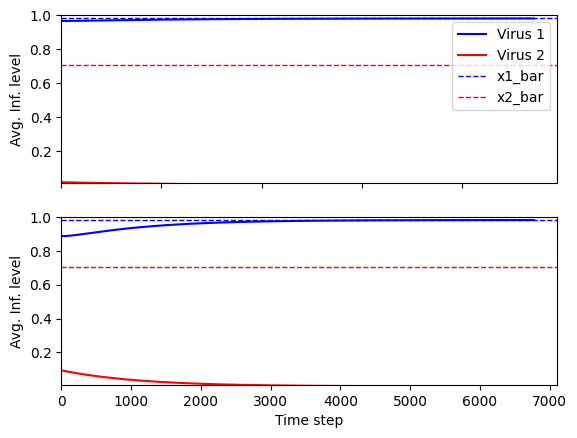

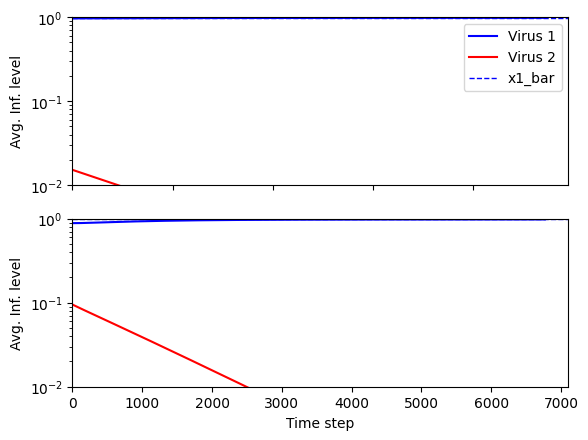

In [9]:
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for i in range(2):
    pertubation = np.random.uniform(0, 0.1)
    x1 = x1_bar - pertubation * np.ones(config.N)
    print("x1 is " + str(x1))
    x2.fill(pertubation)
    print("x2 is " + str(x2))
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)

    # record results
    x1_histories.append(results["x1_history"])
    x2_histories.append(results["x2_history"])
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])

bivirus.plot_simulation_1by2(x1_avg_histories, x2_avg_histories, x1_bar_avg=np.mean(x1_bar), x2_bar_avg=np.mean(x2_bar), yscale='linear')
bivirus.plot_simulation_1by2(x1_avg_histories, x2_avg_histories, x1_bar_avg=np.mean(x1_bar), yscale='log')

In [10]:
print(x1_bar.round(2))
print(x2_bar.round(2))

[0.98 0.99 0.99 0.99 0.99 0.98 0.98 0.98 0.98 0.99 0.97 0.96 0.97 0.97
 0.98 0.98 0.98 0.99 0.98 0.98]
[0.7  0.66 0.79 0.71 0.79 0.75 0.77 0.72 0.7  0.74 0.8  0.38 0.8  0.68
 0.59 0.74 0.59 0.72 0.69 0.76]
